## Computational Homework 5

In this assignment, we will use the diagnostic tools we have discussed to determine if the Gaussian model of linear regression is appropriate for a given dataset. 

For this, we will need to download the file `hw5_data.pkl` from [this link](https://drive.google.com/drive/folders/1OkXMcFo0urN0kSQYH4d75I4V3pnSpV6H?usp=sharing).

Once downloaded (and saved in the same directory as this notebook), the file can be loaded using the following.

In [2]:
import pickle 

with open('hw5_data.pkl', 'rb') as f:
    data = pickle.load(f)
    
data

{'X': array([[0.58231218, 0.65887683, 0.67009968, ..., 0.16247659, 0.63714974,
         0.04502166],
        [0.07078953, 0.49464477, 0.77369583, ..., 0.96132812, 0.0252143 ,
         0.71269283],
        [0.34361051, 0.69163828, 0.79827682, ..., 0.15908261, 0.7295746 ,
         0.1079456 ],
        ...,
        [0.94118786, 0.69139472, 0.00322521, ..., 0.66819908, 0.87952072,
         0.2280973 ],
        [0.02321873, 0.63488777, 0.83716621, ..., 0.81930846, 0.58995066,
         0.38185381],
        [0.32753494, 0.31550366, 0.33145638, ..., 0.11918291, 0.23841417,
         0.48214622]]),
 'y1': array([6.25331714, 5.06015954, 4.88234813, 5.06676296, 4.82458702,
        6.60245745, 4.47891032, 3.90727416, 3.97345761, 5.52769143,
        4.59949073, 4.72314214, 3.88310939, 4.11006087, 5.23885321,
        5.65028678, 6.37608324, 3.77471305, 4.53434048, 5.6784916 ,
        3.94249844, 6.25660186, 4.25954492, 3.42927816, 5.52193496,
        4.76513602, 4.75242015, 4.53657805, 4.97795724, 5.

This file contains 1 feature matrix `X` and 3 vectors of responses, `y1`, `y2` and `y3`. They can be loaded as numpy arrays using the following.

In [18]:
X = data["X"]
y1 = data["y1"]
y2 = data["y2"]
y3 = data["y3"]
print(X.shape, y1.shape, y2.shape, y3.shape)

(500, 20) (500,) (500,) (500,)


As we can see, each dataset consists of $n=500$ examples, and $p=20$ features. (Note, the three datasets here are `(X,y1)`, `(X,y2)` and `(X,y3)` -- so the features are the same for each, but the response vectors are different).

The datasets have the following properties:

- One of the datasets follows a linear model $y = X\beta + \varepsilon$, but $\varepsilon$ is _not_ normally distributed.
- One of the datasets has errors which appear to follow a normal distribution, but the model is not linear.
- One of the datasets follows a linear model and has normally distributed errors. 

Your task is to correctly label which of the three models fits which description, using the two diagnostic tools discussed in lab: QQ plots and residual-fitted value plots (see the [online book](https://rythei.github.io/linear-models/content/basic_linear_regression/diagnostics.html) for examples).

For each of the three datasets, you should create a both the QQ plot and residual-fitted value plot, and explain how you determine which description fits each based on these plots.

**Dataset 1**

For this dataset, we find that i) the errors don't appear to be normal (based on the QQ plot, which deviates substantially from the $y=x$ line), but that ii) from the residual-fitted value plot, the linear model assumption indeed appears to be appropriate.

In [19]:
import numpy as np

def fit_ols(X, y):
    return np.dot(np.linalg.inv(X.T@X)@X.T, y)

beta_hat1 = fit_ols(X, y1)
y1_hat = np.dot(X, beta_hat1)
r1 = y1-y1_hat

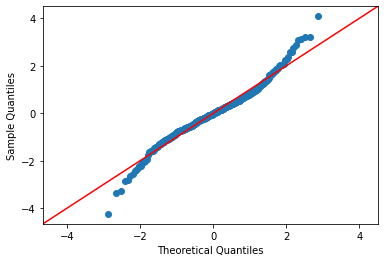

In [20]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

## QQ plot
fig = sm.qqplot(r1, fit=True, line="45")

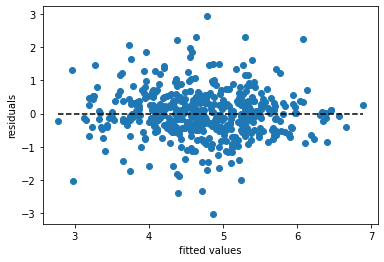

In [21]:
## residual plot
plt.scatter(y1_hat, r1)
plt.hlines(0, np.min(y1_hat), np.max(y1_hat), color='black', linestyle='--')
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.show()

**Dataset 2**

For this dataset, we find that i) the errors _do_ appear to be normal (based on the QQ plot), but that ii) from the residual-fitted value plot, the linear model assumption does not appear to be correct: there is a clear negative trend in the residuals as a function of the fitted values.

In [22]:
beta_hat2 = fit_ols(X, y2)
y2_hat = np.dot(X, beta_hat2)
r2 = y2-y2_hat

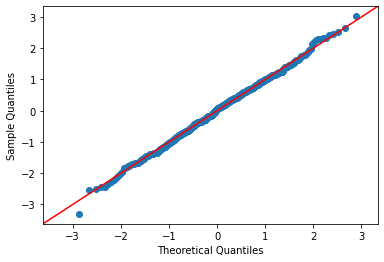

In [23]:
## QQ plot
fig = sm.qqplot(r2, fit=True, line="45")

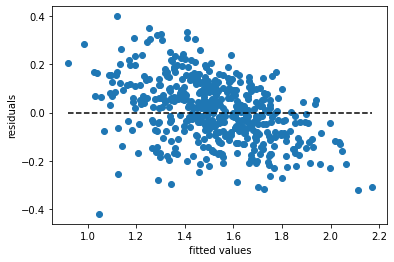

In [24]:
## residual plot
plt.scatter(y2_hat, r2)
plt.hlines(0, np.min(y2_hat), np.max(y2_hat), color='black', linestyle='--')
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.show()

**Dataset 3**

For this dataset, we find that i) the errors _do_ appear to be normal (based on the QQ plot), and that ii) from the residual-fitted value plot, the linear model assumption does appear to be correct: the residuals are evenly distributed around 0 for all fitted values. Hence, this is a dataset for which we can safely apply the statistical tests from the Gaussian model.

In [25]:
beta_hat3 = fit_ols(X, y3)
y3_hat = np.dot(X, beta_hat3)
r3 = y3-y3_hat

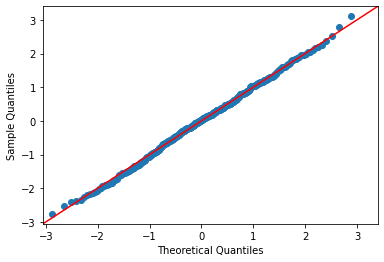

In [26]:
## QQ plot
fig = sm.qqplot(r3, fit=True, line="45")

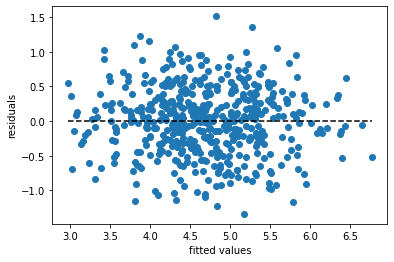

In [27]:
## residual plot
plt.scatter(y3_hat, r3)
plt.hlines(0, np.min(y3_hat), np.max(y3_hat), color='black', linestyle='--')
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.show()